<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Curso Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires* <img alt="Flag of Argentina.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/150px-Flag_of_Argentina.svg.png" decoding="async" width="50" height="34" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/225px-Flag_of_Argentina.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/300px-Flag_of_Argentina.svg.png 2x" data-file-width="800" data-file-height="500">

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-05-25/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

Dicionário das variáveis

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4090,2,26,2019-11-28,0.27,1,271
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1637,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,3072,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,3072,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,3072,1,66,2019-11-27,1.84,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{} ". format(df.shape[0]))
print("Variáveis:\t{}" . format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	23828 
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.277657
last_review                       0.277657
name                              0.000420
host_name                         0.000168
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

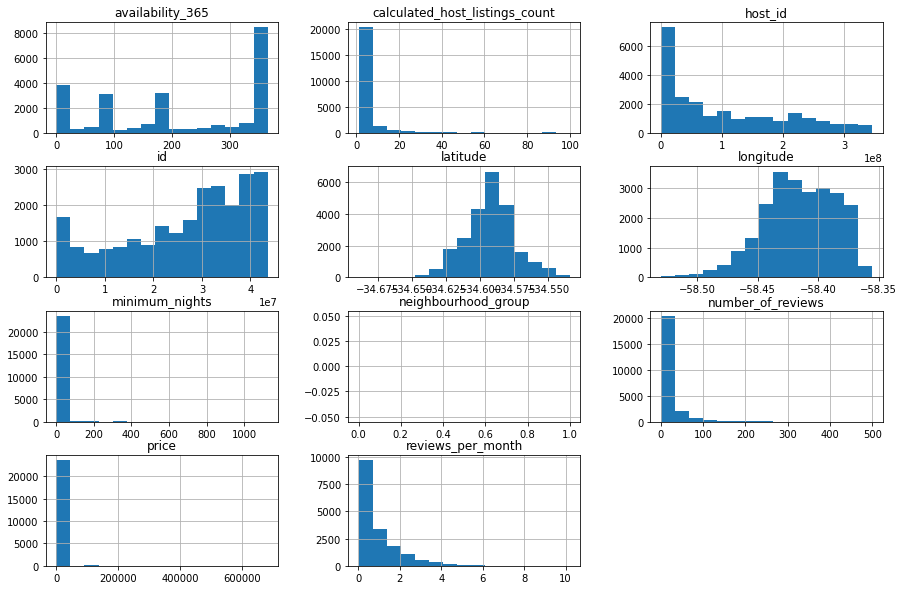

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));


##**Q3.2. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [9]:
df.minimum_nights.unique()

array([   2,    1,    5,   29,    3,    7,   15,    6,   10,    4,   30,
         12,   90,   20,   25,   28,   60,   14,  180,   21,   13,   22,
         50, 1124,   40,   31,    9,    8,  300,  130,  120,  360,   19,
         24,  365,   79,   26,   11,   89,   16,   17,  900,   93,  150,
        175,  100,   45, 1125,  160,   23,   65,   55,   27,   80,   61,
         18,   92,  183,  500,  200,  210,  359, 1100,  240,   91,   57,
         85,   58,  730, 1000,  153])

In [12]:
df.calculated_host_listings_count.unique()

array([  1,   7,   3,   2,  11,   9,   5,  13,   6,  30,   4,  15,   8,
        22,  25,  10,  12,  34,  46,  37,  16,  26,  19,  18,  91,  23,
        24,  62,  35,  58,  14,  33,  17,  20,  28,  71,  55,  43,  90,
       100,  36,  32,  39,  27,  38,  49])

In [11]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23828.000000,23828.000000,23828.000000,17212.000000,23828.000000,23828.000000
mean,4154.259065,6.303676,16.156455,0.952863,6.323737,209.460173
std,17037.797459,25.923081,32.136814,1.067921,14.751120,139.348356
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1367.000000,1.000000,0.000000,0.210000,1.000000,89.000000
50%,2182.000000,3.000000,4.000000,0.560000,1.000000,180.000000
75%,3413.000000,5.000000,17.000000,1.320000,4.000000,364.000000
max,682597.000000,1125.000000,500.000000,10.210000,100.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 3413, porém seu valor máximo é 682597.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

###**BoxPlot para minimum_nights**

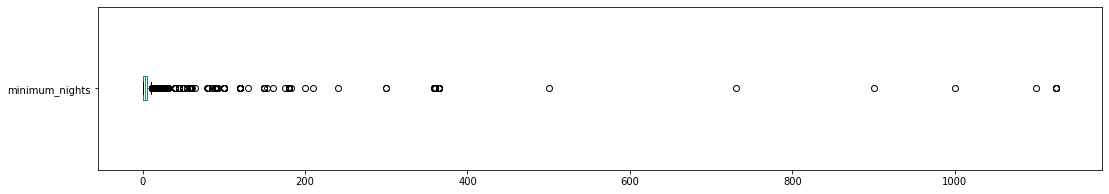

minimum_nights: valores acima de 30:
362 entradas
1.5192%


In [19]:
# plotando minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(18,3))
plt.show()

#ver a quantidade de valores acima de 30 dias para minimim_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

###**BoxPlot para price**

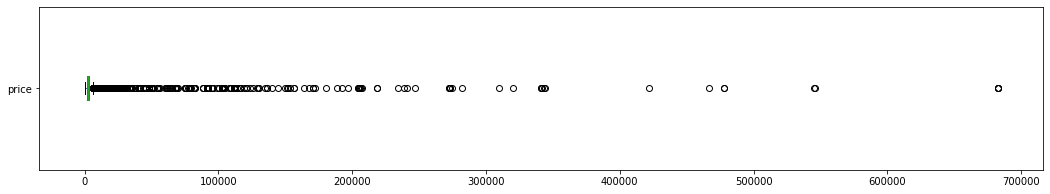

price: valores acima de 1500:
17114 entradas
71.8231%


In [21]:
# plotando price
df.price.plot(kind='box',vert=False,figsize=(18,3))
plt.show()

#ver a quantidade de valores acima de 30 dias para minimim_nights

print("price: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

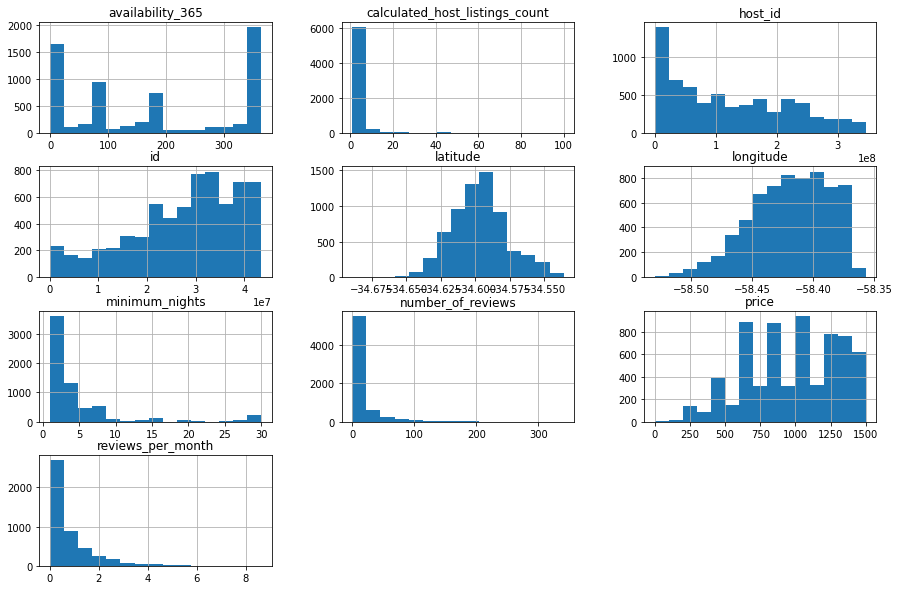

In [23]:
#remover os *outliers* em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
#remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group',axis=1,inplace=True)
#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15,figsize=(15,10));

In [27]:
print("minimum_nights: valores até 30:")
print("{} entradas".format(len(df_clean.minimum_nights)))
print("{:.4f}%".format((len(df_clean.minimum_nights) / df_clean.shape[0])*100))
print("price: valores até 1500:")
print("{} entradas".format(len(df_clean.price)))
print("{:.4f}%".format((len(df_clean.price) / df_clean.shape[0])*100))

minimum_nights: valores até 30:
6605 entradas
100.0000%
price: valores até 1500:
6605 entradas
100.0000%


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print("Média:",df.price.mean())
print("Mediana:",df.price.median())


Média: 4154.259064965587
Mediana: 2182.0


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [28]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.037006,0.077611,0.130889,0.071472,0.113333
minimum_nights,0.037006,1.000000,-0.091082,-0.117253,0.213338,0.070026
number_of_reviews,0.077611,-0.091082,1.000000,0.766446,-0.046860,0.030463
reviews_per_month,0.130889,-0.117253,0.766446,1.000000,-0.074520,-0.015522
calculated_host_listings_count,0.071472,0.213338,-0.046860,-0.074520,1.000000,0.100115
availability_365,0.113333,0.070026,0.030463,-0.015522,0.100115,1.000000


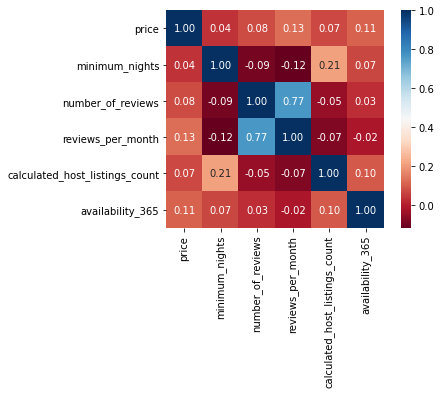

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado em Buenos Aires?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()


Entire home/apt    18475
Private room        4567
Shared room          537
Hotel room           249
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df.room_type.value_counts() / df.shape[0])

Entire home/apt    0.775348
Private room       0.191665
Shared room        0.022537
Hotel room         0.010450
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara em Buenos Aires?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Gral. Mitre    13661.484848
Puerto Madero         7501.831461
Villa Santa Rita      6745.791667
Monserrat             6037.141584
Retiro                5335.106883
Villa Luro            5293.238095
Chacarita             5109.604938
Monte Castro          5022.521739
San Nicolas           4974.449928
Constitucion          4956.018750
Name: price, dtype: float64

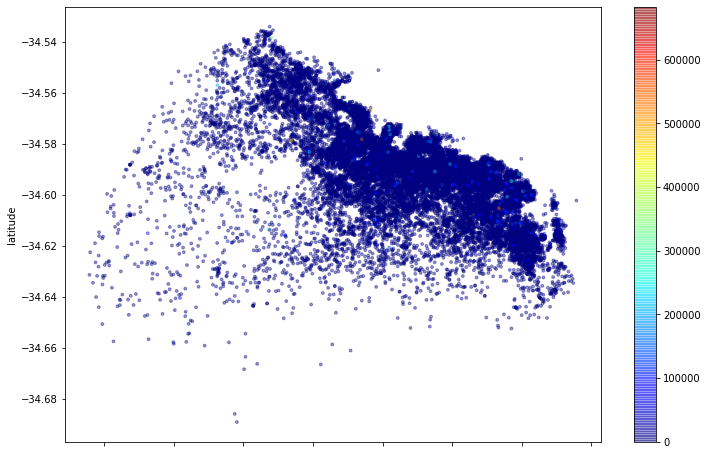

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

6.3036763471546085

## Conclusões


Foi feita uma análise superficial dos dados apenas para conhecimento do dataset resumido do Airbnb.

Para uma análise mais detalhada seria ideal olhar o dataset com mais dados.

Alguns dados apresentaram uma quantidade de dias para locação muito alto, totalmente fora do comum, 1125 dias.

Outros dados apresentaram valores de locação fora do comum, talvez pode ser um erro de digitação ou uma casa muito grande em um bairro diferenciado, mas mesmo assim, valores muito fora do comum. Média de 4150, se for doláres totalmente inviável, já se for peso argentino o valor em real fica algo em torno de R$ 320, um valor aceitável dependendo do bairro e do imóvel a alugar.
